# **ASSIGNMENT** **3**
# DATA ANALYSIS USING PYTHON

#**Datasource**


Electric_Vehicle_population_data.csv

[link text](https://catalog.data.gov)

# **LIST OF QUERIES THAT ARE  TO BE ANSWERED BY DATA ANALYSIS**

1.What is the total count of the vehicles?

2.How many BEV and PHEV are in the dataset?

3.Which brand has more number of customers?

4.Which country has more number of customers?

5.What is the range of electric vehicle over years?

6.Estimate the future prediction of car price?


#**IMPORTING** **DATA**

In [1]:
from google.colab import files
uploaded =files.upload()

Saving ev python.csv to ev python.csv


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [4]:
import io
data=pd.read_csv(io.BytesIO(uploaded['ev python.csv']))

In [5]:
data.head()

,County,City,State,ZIP Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP
0,Thurston,OLYMPIA,WA,98502,2018,TOYOTA,PRIUS PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,25,27300
1,King,KENT,WA,98031,2018,TOYOTA,PRIUS PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,25,27300
2,King,FEDERAL WAY,WA,98023,2017,FORD,FUSION ENERGI,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,21,33120
3,King,SEATTLE,WA,98136,2018,BMW,I3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,114,44450
4,King,KENT,WA,98032,2013,FORD,FOCUS,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,76,39200


In [6]:
data.shape

(1000, 11)

In [7]:
data.isnull().sum()

County                                               0
City                                                 0
State                                                0
ZIP Code                                             0
Model Year                                           0
Make                                                 0
Model                                                0
Electric Vehicle Type                                0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0
Electric Range                                       0
Base MSRP                                            0
dtype: int64

from the observation it seems that there is no nal value  in the given  data set


**Q1: what is the total count of the vehicles?**

In [14]:
data['Model'].value_counts().sum()

1000

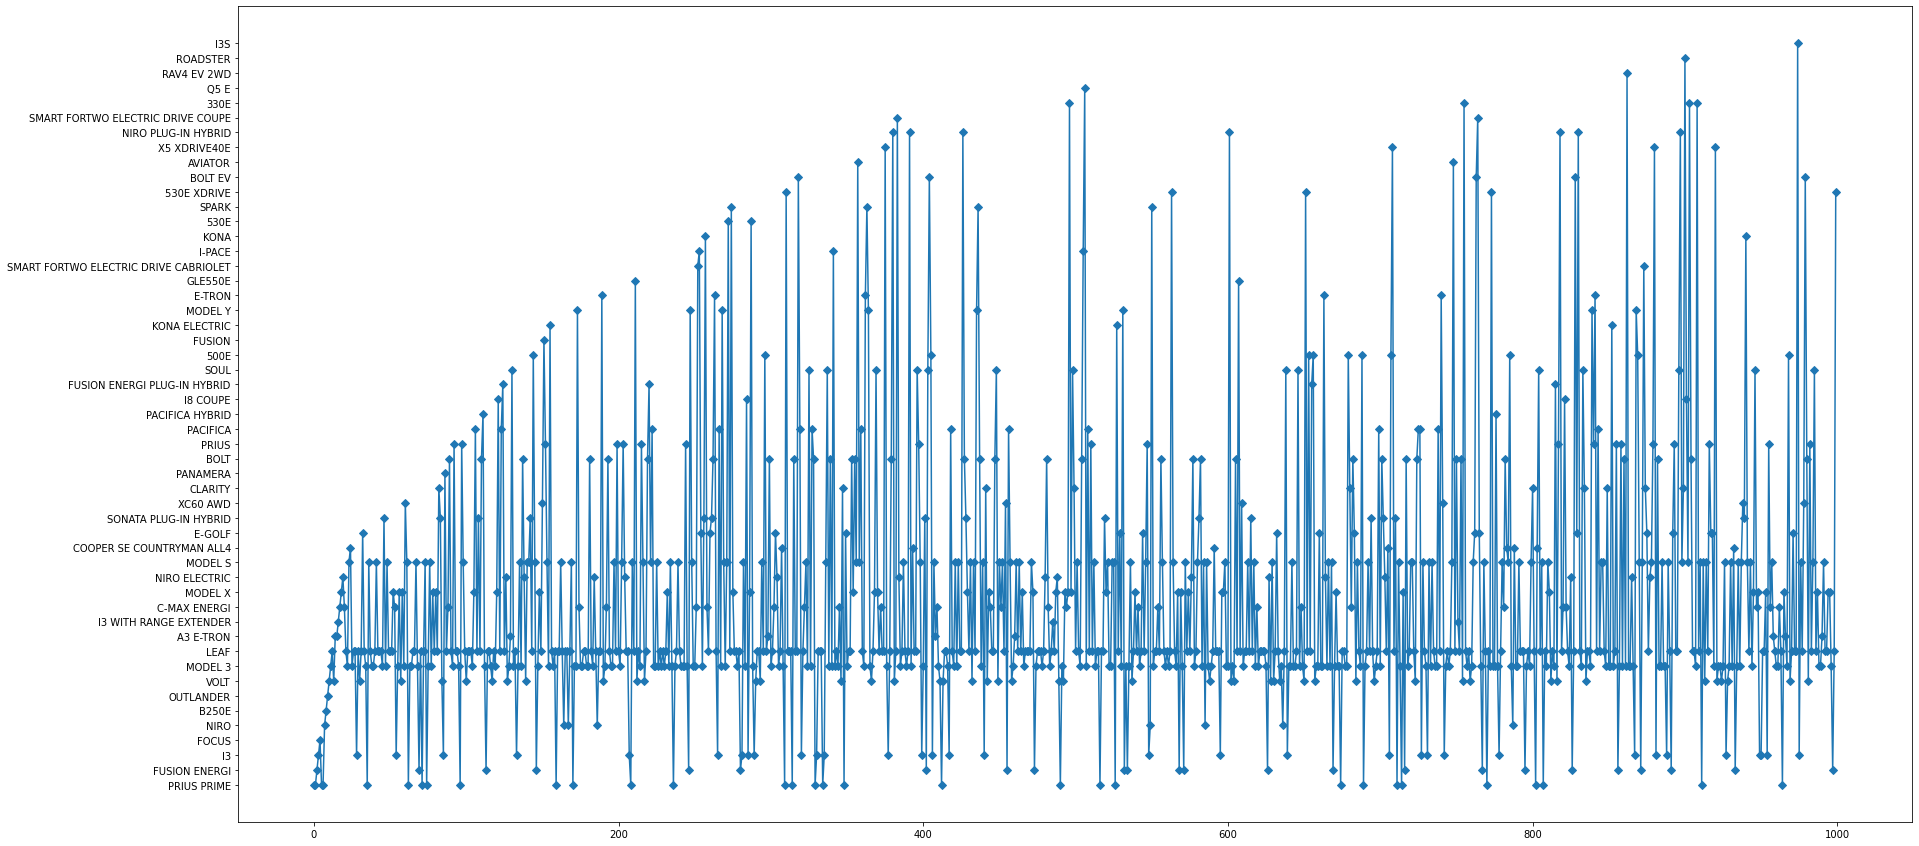

In [11]:
f,axis=plt.subplots(figsize=(30,15))
plt.plot(data['Model'],marker="D")

**Q2:** **how many BEV AND PHEV in the dataset?**


In [ ]:
data['Electric Vehicle Type'].value_counts()

Battery Electric Vehicle (BEV)            708
Plug-in Hybrid Electric Vehicle (PHEV)    292
Name: Electric Vehicle Type, dtype: int64

**Q3.which brand has more number customers?**


In [15]:
data['Make'].value_counts()

TESLA            345
NISSAN           230
CHEVROLET         91
FORD              58
BMW               57
TOYOTA            51
KIA               46
HYUNDAI           20
VOLKSWAGEN        18
CHRYSLER          17
AUDI              16
FIAT              11
HONDA             10
MINI               9
VOLVO              7
SMART              4
JAGUAR             3
MERCEDES-BENZ      3
LINCOLN            2
PORSCHE            1
MITSUBISHI         1
Name: Make, dtype: int64

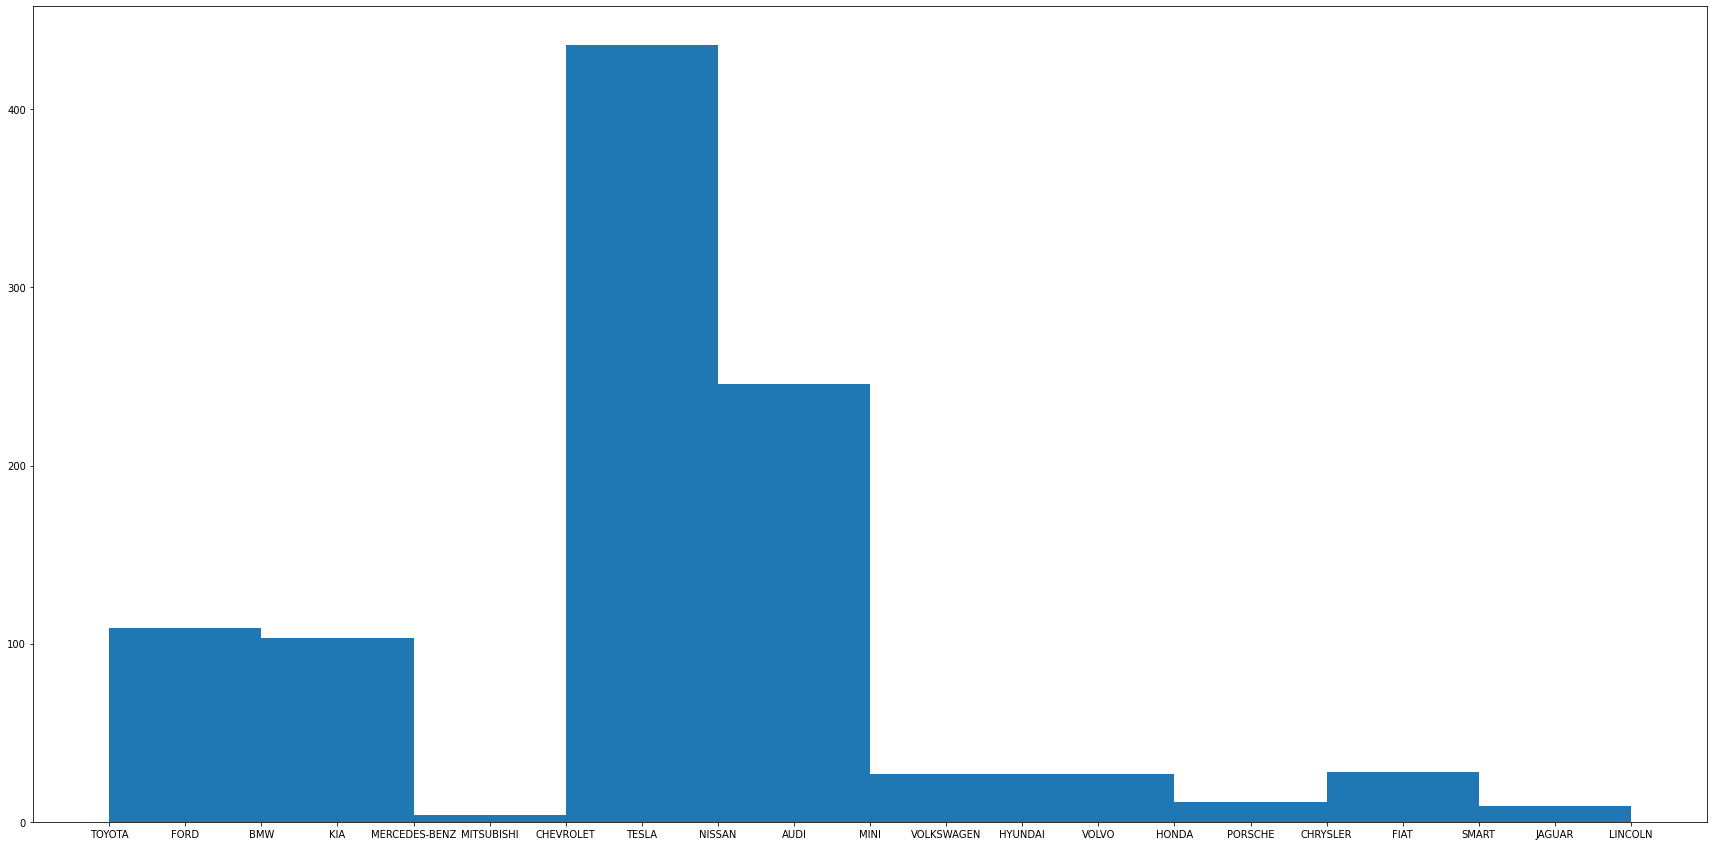

In [16]:
f,axes=plt.subplots(figsize=(30,15))
_=plt.hist(data['Make'])

**Q4.which country has more numbers of customers?**


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


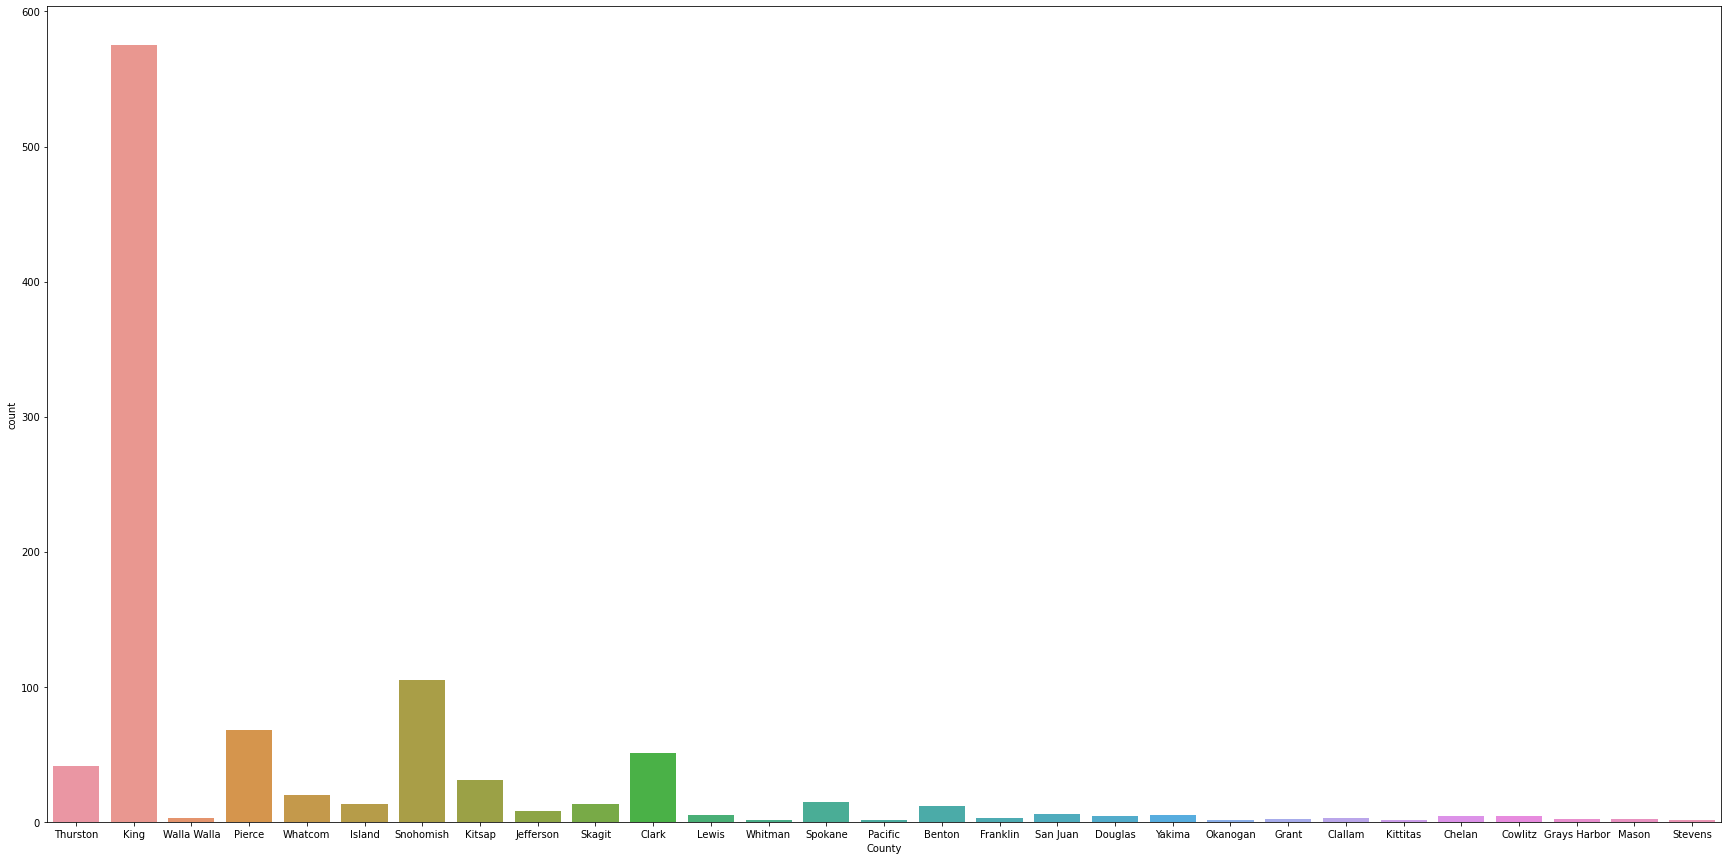

In [ ]:
f,axes=plt.subplots(figsize=(30,15))
sns.countplot(data['County'])

**Q5:range of the electric vehicle over the years?**

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


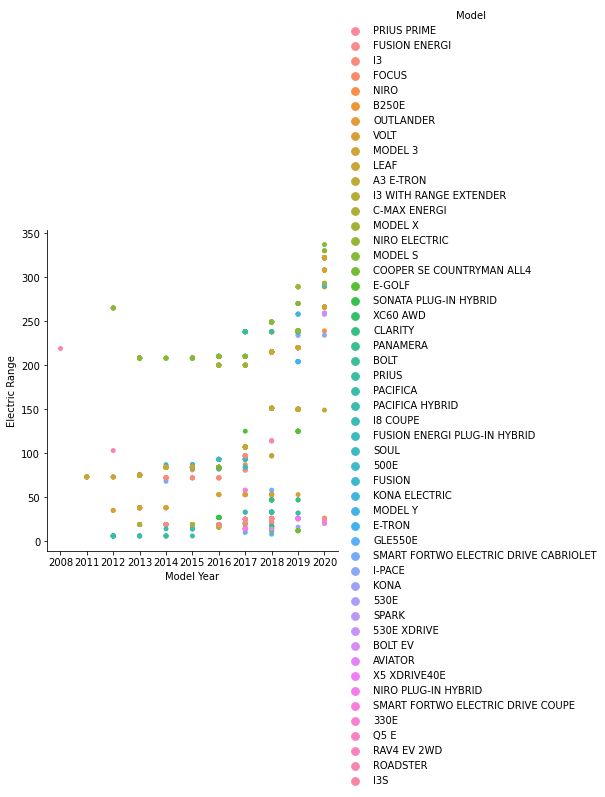

In [17]:
sns.catplot("Model Year","Electric Range",hue='Model',data=data,jitter=False)

# **future** **prediction**

**Q6:Estimate the future prediction of car price?**

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

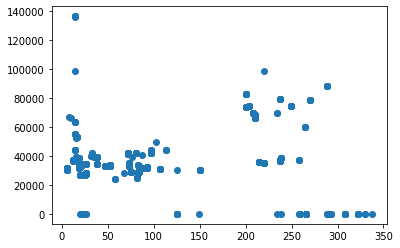

In [19]:
plt.scatter(data['Electric Range'],data['Base MSRP'])

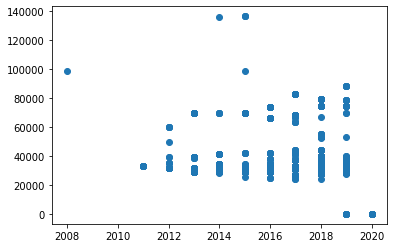

In [20]:
plt.scatter(data['Model Year'],data['Base MSRP'])

In [21]:
X=data[['Electric Range','Model Year']]
y=data['Base MSRP']

In [22]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [24]:
print(X_train)

     Electric Range  Model Year
133              72        2015
228             215        2018
396              93        2017
291              84        2016
254             125        2019
..              ...         ...
543              75        2013
165             150        2019
476              84        2014
251              19        2016
435             291        2020

[800 rows x 2 columns]


In [25]:
print(X_test)

     Electric Range  Model Year
516              25        2017
129              16        2018
434              84        2015
851             215        2018
954              97        2017
..              ...         ...
912             208        2015
831              84        2014
738              33        2018
176             215        2018
148             200        2016

[200 rows x 2 columns]


In [26]:
clf =RandomForestRegressor()
clf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [27]:
y_predict=clf.predict(X_test)

In [28]:
print(r2_score(y_test,y_predict))

0.9804720717973012


From the observation we get 98% accuracy for future prediction